# Figure 4: Distribution of extinction times

Generate **figures/hist.pdf** and calculate summary statistics for meltdown
under default mutational parameters.

In [1]:
from doomed import *
import pandas as pd

In [2]:
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Helvetica'
rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath']

/Users/rbazev/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  """


### Expected extinction time

In [3]:
# Default parameters
u = 0.023
s = 0.075
Z0 = List([1000])

In [4]:
m, v = extinction_time(Z0, 15, s, u, 1e-8)
print('Expected value:', round(m, 3))
print('            CV:', round(np.sqrt(v) / m, 2))

Expected value: 192.814
            CV: 0.28


### Expected time of first click

In [5]:
m2, v2 = click_time(1000, 0, s, u, 1e-8)
print('Expected value:', round(m2, 3), '   ', round(m2/m * 100, 1), '%')
print('            CV:', round(np.sqrt(v2) / m2, 2))

Expected value: 187.227     97.1 %
            CV: 0.29


### Expected population size at extinction time

In [6]:
ENt(Z0, 193, s, u)

15.315991787240872

### Time required for expected population size to drop below 1

Checking approach proposed by Lansch-Justen et al. (2022).

Estimate: 311 generations.

In [7]:
for n in range(309, 314):
    print(n, ENt(Z0, n, s, u))

309 1.0301834200095903
310 1.0064892013501867
311 0.9833399497198713
312 0.9607231308769818
313 0.9386264988674147


### Probability that a population is extinct at that time 

In [8]:
prob_extinct(Z0, 311, 50, s, u)

0.9658405431739547

### Probability density

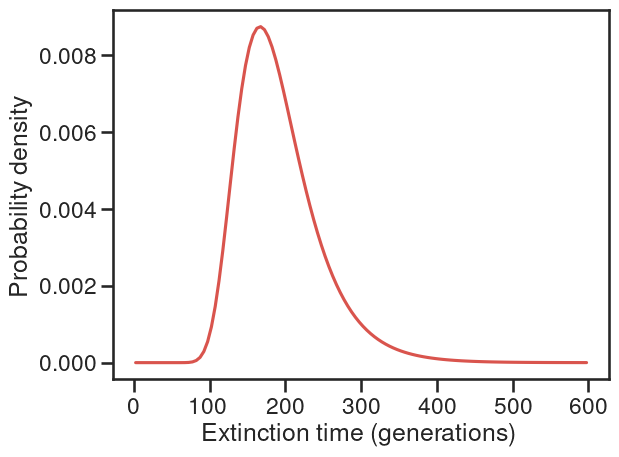

In [9]:
red = sns.xkcd_rgb["pale red"]
theoryT = []
theoryP = []
binw = 5
t1 = 0
p1 = 0
for i in range(1, 121):
    t2 = i * binw
    p2 = prob_extinct(Z0, t2, 15, s, u)
    theoryT.append((t1+t2)/2)
    theoryP.append((p2-p1) / binw)
    t1 = t2
    p1 = p2
plt.plot(theoryT, theoryP, color=red)
plt.ylabel('Probability density')
plt.xlabel('Extinction time (generations)');

### Stochastic simulations

You can skip directly to the "Load data" section below.

In [ ]:
tt = []
for i in range(10000):
    tmpN, tmpZ, t = to_extinction(Z0, s, u)
    tt.append(t)
t = np.array(tt)
t.mean(), t.var(ddof=1), len(t)

### Save data

Save extinction times.

In [ ]:
with open('../data/hist.npy', 'wb') as f:
    np.save(f, t)

### Load data

Extinction times can be retrieved directly.

In [10]:
t = np.load('../data/hist.npy')

In [11]:
t.min(), t.max()

(81, 541)

In [12]:
bins = np.arange(10 * np.floor((t.min()-1)/10), 10 * np.ceil((t.max()+1)/10) + 1, 10)
bins

array([ 80.,  90., 100., 110., 120., 130., 140., 150., 160., 170., 180.,
       190., 200., 210., 220., 230., 240., 250., 260., 270., 280., 290.,
       300., 310., 320., 330., 340., 350., 360., 370., 380., 390., 400.,
       410., 420., 430., 440., 450., 460., 470., 480., 490., 500., 510.,
       520., 530., 540., 550.])

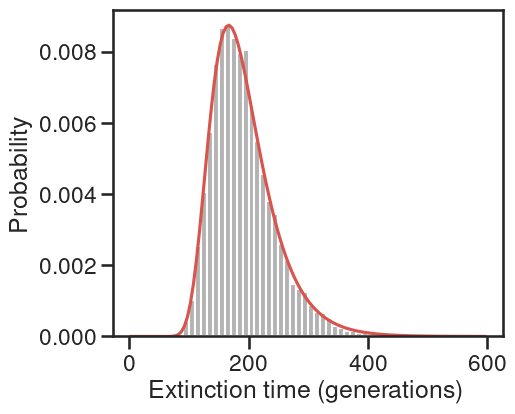

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.set_position([.212, .175, .78, .817])
ax.hist(t, bins=bins, density=True, color="0.7")
ax.plot(theoryT, theoryP, color=red)
ax.set_ylabel('Probability')
ax.set_xlabel('Extinction time (generations)')
fig.savefig('../figures/hist.pdf');